In [1]:
import numpy as np
import pandas as pd
import warnings
import os
import sys

from IPython import get_ipython

root_dir = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(root_dir)

from utils.utils import get_absolute_path, run_query
from utils.constant import *

pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")


user = os.environ.get('VERTICA_USER')
    password = os.environ.get('VERTICA_PASSWORD')

In [2]:
# Load the data from database

input_script = get_absolute_path(
    filename="mc1_sales.csv",
    relative_path='data',
    base_dir=PROJECT_BASE_DIR
)

input_df = pd.read_csv(input_script)

In [3]:
input_df

,order_placed_dttm,product_merch_classification1,net_sales,units
0,2022-11-16,Consumables,1.673013e+07,755380
1,2022-11-17,Consumables,1.640798e+07,735910
2,2022-11-18,Consumables,2.128113e+07,933291
3,2022-11-19,Consumables,1.683139e+07,753320
4,2022-11-20,Consumables,1.557874e+07,704845
...,...,...,...,...
2361,2023-11-12,Specialty,8.560415e+05,48582
2362,2023-11-13,Specialty,8.920938e+05,50034
2363,2023-11-14,Specialty,8.205983e+05,46323
2364,2023-11-15,Specialty,7.672188e+05,43586


In [4]:
df = input_df

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



# Set the 'order_placed_dttm' column as the index
df.set_index('order_placed_dttm', inplace=True)


In [6]:
df

,product_merch_classification1,net_sales,units
order_placed_dttm,,,
2022-11-16,Consumables,1.673013e+07,755380
2022-11-17,Consumables,1.640798e+07,735910
2022-11-18,Consumables,2.128113e+07,933291
2022-11-19,Consumables,1.683139e+07,753320
2022-11-20,Consumables,1.557874e+07,704845
...,...,...,...
2023-11-12,Specialty,8.560415e+05,48582
2023-11-13,Specialty,8.920938e+05,50034
2023-11-14,Specialty,8.205983e+05,46323


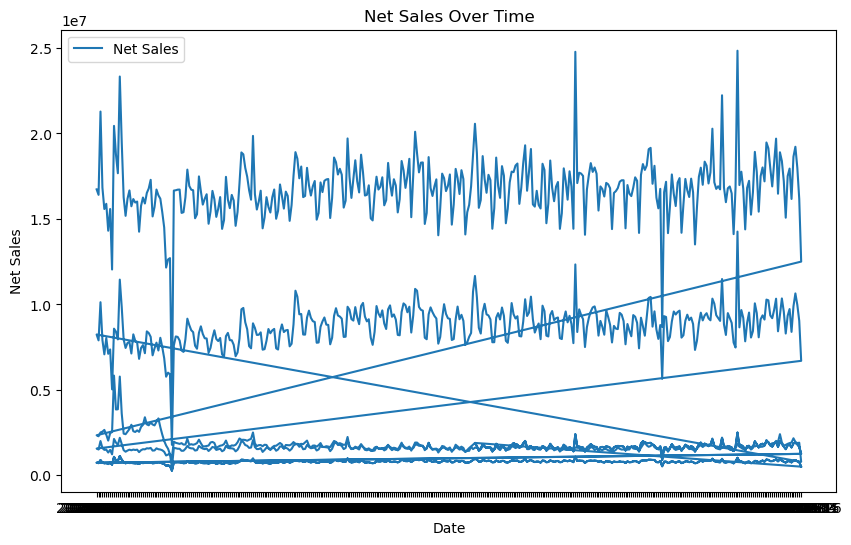

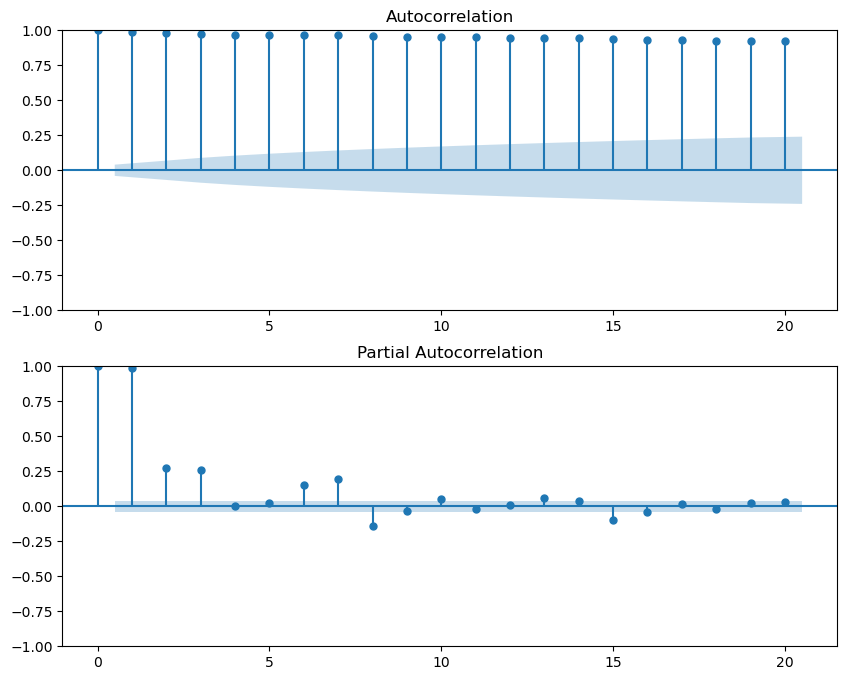

/Users/yli3/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yli3/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yli3/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/yli3/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
 T

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.51791D+01    |proj g|=  1.39341D-01

At iterate    5    f=  1.51393D+01    |proj g|=  5.91718D-02

At iterate   10    f=  1.51269D+01    |proj g|=  5.93558D-03

At iterate   15    f=  1.51263D+01    |proj g|=  1.20135D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     19      1     0     0   6.782D-05   1.513D+01
  F =   15.126262780339825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/yli3/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


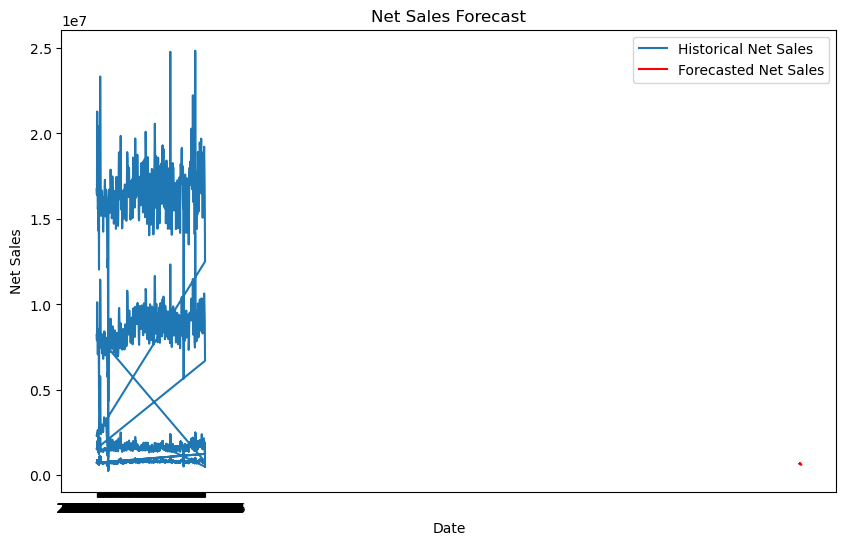

In [7]:

# Visualize the time series data
plt.figure(figsize=(10, 6))
plt.plot(df['net_sales'], label='Net Sales')
plt.title('Net Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.legend()
plt.show()

# Check for seasonality using autocorrelation and partial autocorrelation plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['net_sales'], lags=20, ax=ax1)
plot_pacf(df['net_sales'], lags=20, ax=ax2)
plt.show()

# Fit SARIMA model
order = (1, 0, 1)  # Adjust these values based on your data characteristics
  # Example order, you may need to tune this
seasonal_order = (1, 1, 1, 7)  # Adjust these values based on your data characteristics
model = SARIMAX(df['net_sales'], order=order, seasonal_order=seasonal_order)
results = model.fit()

# Forecast future values
forecast_steps = 7  # You can adjust this based on your needs
forecast = results.get_forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(df['net_sales'], label='Historical Net Sales')
plt.plot(forecast.predicted_mean, label='Forecasted Net Sales', color='red')
plt.title('Net Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.legend()
plt.show()


In [8]:
df

,product_merch_classification1,net_sales,units
order_placed_dttm,,,
2022-11-16,Consumables,1.673013e+07,755380
2022-11-17,Consumables,1.640798e+07,735910
2022-11-18,Consumables,2.128113e+07,933291
2022-11-19,Consumables,1.683139e+07,753320
2022-11-20,Consumables,1.557874e+07,704845
...,...,...,...
2023-11-12,Specialty,8.560415e+05,48582
2023-11-13,Specialty,8.920938e+05,50034
2023-11-14,Specialty,8.205983e+05,46323


In [9]:
from fbprophet import Prophet

# Reset the index to make 'order_placed_dttm' a column again
df.reset_index(inplace=True)

# Prepare the data in the required format for Prophet
prophet_data = df[['order_placed_dttm', 'net_sales']]
prophet_data.columns = ['ds', 'y']

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_data)

# Create a dataframe with future dates for prediction
future = model.make_future_dataframe(periods=7)  # Adjust the number of periods as needed

# Generate forecasts
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AttributeError: module 'numpy' has no attribute 'float'.
`np.float` was a deprecated alias for the builtin `float`. To avoid this error in existing code, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations